# Introduction
In Module 1, we talked about principles, which underly good visualizations, we pulled from work by Cairo and Tufty.

In Module 2, we opened up the Matplotlib Python Library. Starting with the architecture and working our way through some the most common kinds of plots: Scatter plots, line graphs and bar charts. 

In this module, we're going to do a bit deeper and talk about
- multiple plots in the same figure,
- interaction,
- animation 
- and a few more kinds of plots which you might find useful in your data science journey. 

Now, if you've been doing these assignments, you've undoubtedly been visiting our course discussion forms, going to stack overflow, and reading the map plot live API documentation. I want to point you to the _Matplotlib mailing list_ as well is another great resource.

> There would be resource posted below on how to browse that list. 

It's pretty common with open source projects to have two mailing lists. 
1. One for developers and
2. the other for users.

The users place is where most of the question answering happens. But I encourage to you look at the developer archives, too, to get an idea as to what these kind of projects look like behind the scenes.


# Subplots

https://www.coursera.org/learn/python-plotting/lecture/ZXfdv/subplots

Let's start this module with a deeper look at subplots. Thus far we have been using a _single_ axis object to plot a _single_ graph or figure. Sometimes it is useful to show _two_ complex plot side by side for the viewer to compare. Matplotlib handles this with a single figure. 

- Let's first set our rendering backend to the __nbAgg__ backend, 
- then import our Pyplot module and NumPy, as we'll need then both.
- If we look at the subplot documentation, we see that the
    - first argument is the number of rows, 
    - the second the number of columns, and
    - the third is the plot number. 
 

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

plt.subplot?

## subplot func
In matplotlib, a conceptual _grid_ is overlayed on the figure and a __subplot__ command allows you to create axis to different portions of this grid. 

For instance, if we want to to create two plots _side by side_, we would call subplot with the parameters 1, 2, and 1. 
- This would allow us to use 1 row, 
- with 2 columns, and 
- set the first axis to be the current axis. 

Let's do this now. We'll 
- create a new figure and 
- then a new subplot with one row and two columns.
- And we'll ask for the left hand side axis. 

The greatest number alternatively from left to right and top to bottom. So subsequent calls to plot would create the left hand side plot. 

<IPython.core.display.Javascript object>


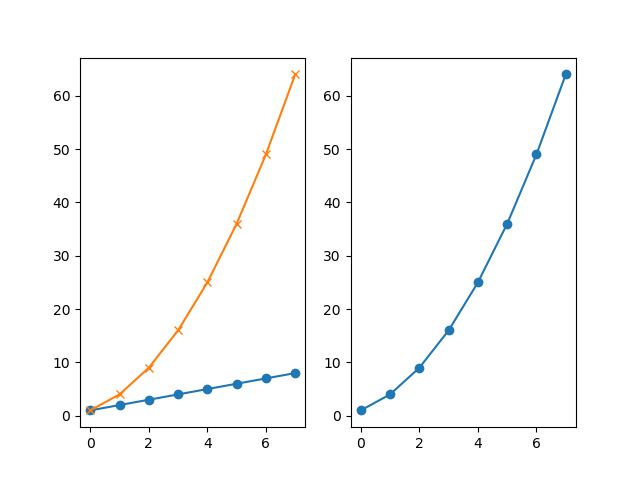

In [2]:
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)

linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data, '-o')

Okay, great we've got a _skinny_ plot on the left hand side.

We can then call subplot _again_ with the last parameter as a __two__ to plot new data to a plot on the _right_ hand side. 


In [3]:
exponential_data = linear_data**2 

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

And that's nice. Now we have two plots, each with their own axis objects. 

Now the norm with matplotlib is that you _store_ the axis object that you get back from the subplot. But you can call subplot again at any time with the parameters that interest you in order to get back a given axis. 

Here, let's put exponential on the linear graph 2

In [4]:
# plot exponential data on 1st subplot axes
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

C:\Users\jkang1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


This demonstrates a common _problem_, it looked like linear had roughly the same area under the line on the chart until we asked matplotlib to put them into one graph. Then the y axis was refreshed. 

There would be a big problem with _misleading_ the reader if we didn't find a way to _lock_ axis between two plots. When you create a new subplot you are able to __share__ the x, y, or both axis using the share x and share y parameters.

Here's how we could clean this up,
- we create a new figure.
- Then created a subplot on the left-hand side store it in AX1.
- After plotting that data we create the axis on the right-hand side, and 
- we indicate _explicitly_ we want to share the y-axis.

Now we _don't_ have to store the subplot to a variable like we did with AX1. Remember that when you use the scripting interface, high plot is going to get the current axis object with gca() or get current axis underneath. So a call to pyplot.plot will transparently work with the last axis objects that we're using.

<IPython.core.display.Javascript object>


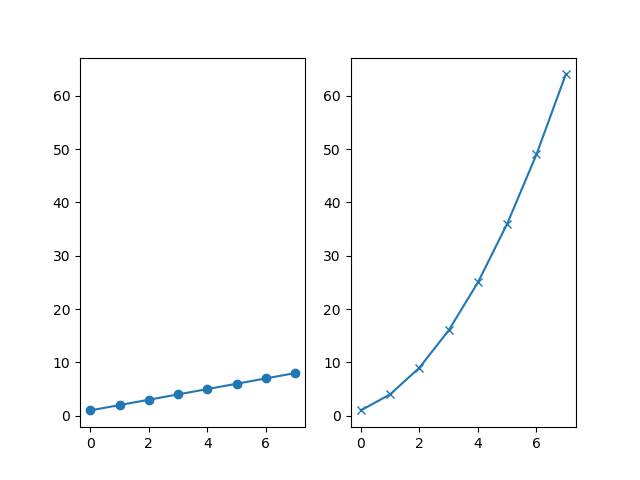

In [5]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

There we go. Two plots side by side and we've locked the y axis. 

Now, those of you who have been playing close attention will note that I used the __add subplot__ function in the last module. But I didn't pass in three parameters, _just_ one. 

The maplotlib developers allow you to
- specify the row, columns, and number of the plot that you want with either _three_ parameters 
- or a _single_ parameter where the hundreds values the first argument, the tens the second argument, and the ones the third argument. 

So we will call subplot with three parameters, one, two, and one. And the axis that return should be equal to 1, which is created with the 1 parameter.

<IPython.core.display.Javascript object>


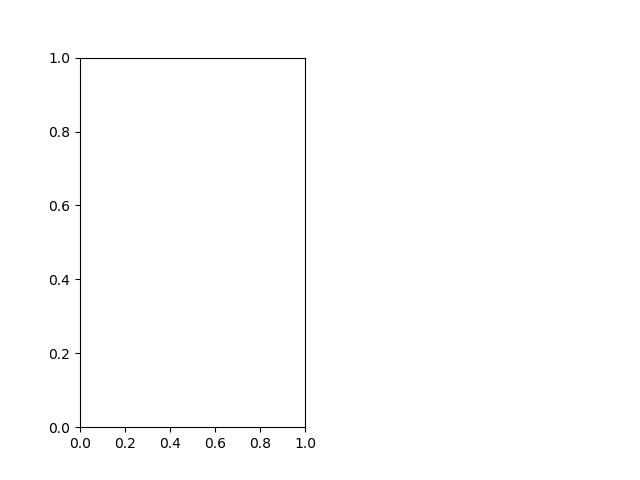

C:\Users\jkang1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


True

In [6]:
plt.figure()
# the right hand side is equivalent shorthand syntax but not preferred
#note that index starts at one, not zero
plt.subplot(1,2,1) == plt.subplot(121)

I'm frankly not a big fan of this second syntax. It feels pretty hacky and it really only saves typing two commas and yet limits us to single digit radius. 

Now computer science folks might feel a little twitch inside like something's wrong with this notation. And I'll say that it certainly bugged me the first few times I saw it: an important fact to remember is that the plot location in the matrix of items is indexed starting at __one__ and _not_ at zero, as would be the convention if you were using something like NumPy.

So if you're iterating through a matrix or list, create subplots, remember to start at position _plus one_. 

## subplots func
Now, there's a nice function called __subplots__, note the plural, which allows you to get _many_ axis objects at once, and I think this is great.

So, if we wanted to get a three by three grid with all of the axis x and y ranges locked, we can do so like this. 

The syntax looks a little goofy maybe since we're unpacking the results of the subplots function directly, but it's an effective way to build a grid where everything shares an axis.

> And of course, you could just return the tuple of plots and iterate it over if you wanted to. 

<IPython.core.display.Javascript object>


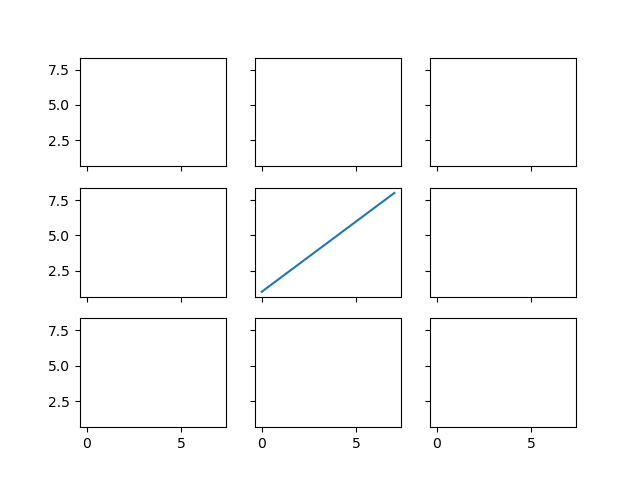

In [10]:
# create a 3x3 grid of subplots. Note difference between subplot & subplots functions
# creates many axis objects at once
# locks x and y ranges
# note that it turns off labels except the left and bottom. Need to iterate through to put them on all the axes
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')

The results however look really nice. Note that this method turns _off_ the y and x labels except for those plots which are on the left hand side or the bottom of the figure. 

If you want to turn the labels back __on__ , you need to 
- iterate through the axis objects and do it _yourself_.
    - You could do this _directly_ through the axis objects you have 
    - or iterate through all the axis objects in the figure and change the x and y tick labels to be visible.
- Unfortunately, on the notebook backend on my installation, this _doesn't_ redraw the figure
- But you can _force_ the figure to redraw by calling the canvas.draw() function. 

Remember you can get the current figure at any time using pyplots gcf or get current figure or function. 

Okay, so those are the basics of subplots and matplotlib. You can see that you can leverage everything you learned to the last module with this new knowledge to create figures which have rich subplots. 

In the next module, I want to exploit this while introducing you to pretty fundamental data science chart: the histogram.

In [12]:
# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [13]:
# necessary on some systems to update the plot
plt.gcf().canvas.draw()

# Histograms

https://www.coursera.org/learn/python-plotting/lecture/yAzOV/histograms

A histogram is a bar chart which shows the frequency of a given phenomena.

A great example are probability distributions. 
- For instance, in the first course in this specialization, we touched on the difference between the random, uniform, normal, and chi squared distributions. 
- Probability function can be visualized as a curve, where the y-axis holds the probability a given value would occur, and the x-axis is the value itself. This is called a probability density function.
    - The y-axis values are limited to between zero and one, where zero means there's no chance of a given value occurring and one means that the value will always occur.
    - The x-axis values are labeled in terms of the distribution function. In the case of the normal distribution, this is usually in terms of standard deviations.
    
So a histogram is just a bar chart where the x-axis is a given observation and the y-axis is the frequency with which that observation occurs. So we should be able to plot a given probability distribution by _sampling_ from it.

> Now, recall that sampling means that we just pick a number out of the distribution, like rolling a die or pulling a single card out of a deck. As we do this over and over again, we get a more accurate description of the distribution. 

Let's pull some samples from the normal distribution and plot four different histograms as subplots. 

- First I'll create our 2 x 2 grade of axis objects. 
    - In this case, we don't want to share the y-axis between the plots since we're _intentionally_ looking at a number of different sizes of samples. 
    - We're mostly interested in how uniform the distribution looks. 
- Then we can iterate through a list of four different values, 10, 100, 1,000 and 10,000. 
- And we'll pull samples from the NumPy. Remember that the _normal_ function of random just creates a list of numbers based on the underlying normal distribution. 
- We can then plot these to a given axis object using the hist function.
- And set the title as appropriate.

Well, there we go.

<IPython.core.display.Javascript object>


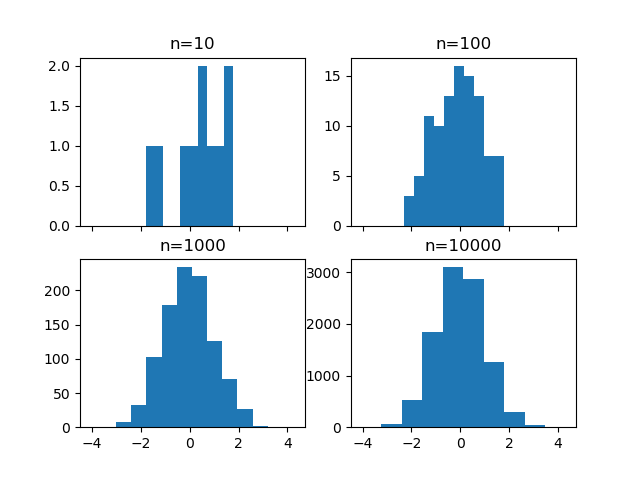

In [14]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

The first plot only has ten samples, so it looks pretty jagged. And in my version here I don't think anyone would say this is obviously a normal distribution. When we jump to 100 samples, it gets better, but still quite jagged. Then it seems to smooth out a bit on the plots for 1,000 and 10,000 samples. 

But if we look closely, we can see that the bar of the 10,000 plots are actually _wider_ than those of the 10 or the 100 plot. _What's going on here?_

By default, the histogram in Matplotlib uses __10__ bins, that is ten different bars. Here we created a shared x-axis, and as we sample more from the distribution, we're more likely to get outlier values further from our mean. 

Thus, ten bins for n=10 is at best capturing ten unique values, while for n=10,000, many values have to be _combined_ into a single bin.

Let's do the same function with the bin set to __100__ 

<IPython.core.display.Javascript object>


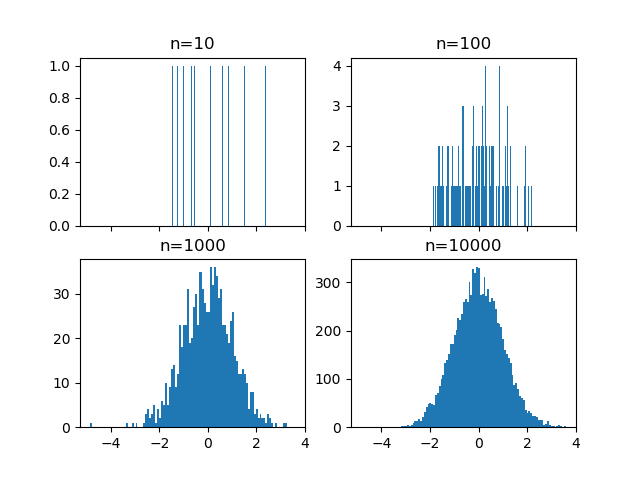

In [16]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

Now we see that the 10,000 sampled plot looks much smoother than all of the others. And the 10 sample plot shows that each sample is basically in its own bin. 

So I think this brings up an important question of how many bins you should plot when using a histogram: <font color=red>I'm afraid that the answer isn't really clear</font>. 

Both of these plots are true:
- one is a visual of the data at a _coarse_ granularity, and 
- one at a more _fine_ grain granularity. 

When we look at the finest granularity in our data, plotting with 10,000 bins then the histograms became basically useless for decision making. Since they aren't showing trends between samples as much as they're just showing the sample size themselves. 

> This is similar to using aggregate statistics like the mean in standard deviation to describe a sample of a population: these values are coarse and whether they are appropriate depends highly on your questions and interests.

I've linked here to an optional reading which considers the issue of how many bins are appropriate from a couple of different statistical stances. But keep in mind this understanding that there's just _no_ right or wrong, just useful and useless for a given need. 

## GridSpec layout
I want to use our newfound knowledge of histograms and subplots to introduce you to a more flexible __GridSpec__ layout for subplots.

The GridSpec allows you to map axes over multiple cells in a grid. 

For instance, let's create a scatter plot where
- the y values come from the normal distribution, and 
- the x values come from a random distribution. 

<IPython.core.display.Javascript object>


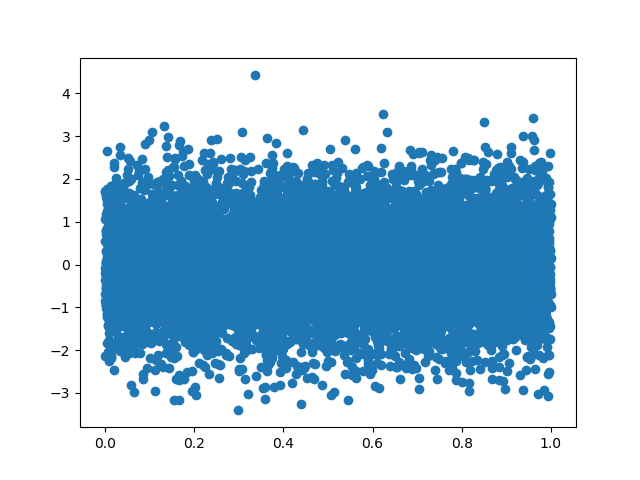

In [15]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

It's not totally clear from looking at this plot what the actual distributions are for each axis, but we could add two _smaller_ plots, each histograms, to make this a bit more clear.

I'm going to define a 3x3 grid, nine cells in total. 
- I want the first histogram to take up the _top right_ space, and
- the second histogram to take up the far _left bottom_ two spaces, _rotated_ on its side. 
- The original scatter plot can take up a two by two square in the bottom right. 

To use the GridSpec, we
- first import it, then
- create a new GridSpec, the overall shape that we want. 
- When we add new items with the subplot, instead of specifying the three numbers of row, column and position, we pass in the elements of the GridSpec object which we wish to cover. 
    - And very important here. Because we are using the elements of a list, all of the indexing starts at _zero_, and
    - it is very reasonable to use slicing for the beginning or ends of lists. 

The GridSpec is indexed as rows and columns using the indexing operator, or square brackets. 
- So we'll create the first subplot and histogram in row 0, covering off the first element, the middle position, and going to the end of the row.
- We'll create the side_histogram starting in row 1, and continuing to the end of row elements, but limited to the 0th column. 
- Finally we'll create the scatter plot in the lower_right.

When we execute this, we see our basic set of plots, great. 

<IPython.core.display.Javascript object>


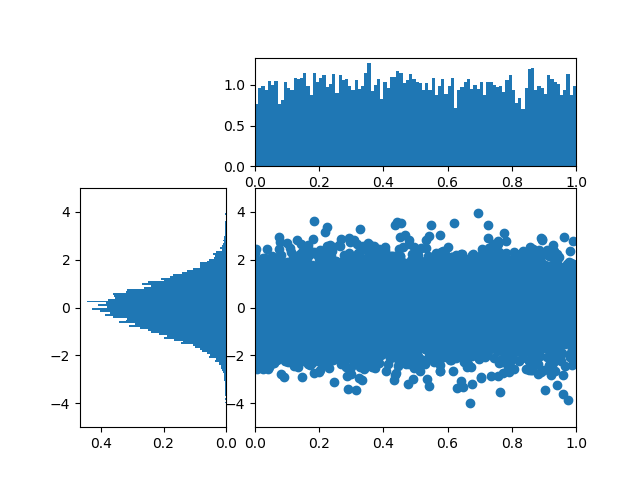

In [22]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

#because using elements of a list, indexing starts at zero
#if this cell is run, will show the basic outline for the plots below
top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

Now, let's fill this with some data.
- First the scatter plot,
- then the top histogram, which is for the x values,
- then the side histogram for the y values.

And we want the side histogram to be lined up, so let's rotate the layout by setting the orientation. There are actually a few ways of doing this, but since it's so common, Matplotlib has an orientation parameter which we can set to horizontal. 

In [23]:
#normal distribution
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)

#random distribution
X = np.random.random(size=10000)

#create main scatter plot in bottom right and respective histograms in top and left side
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal') #rotate layout to set orientation

Okay, this is close. We _don't_ really care about the value of the y-axes for the top histogram or the value of the x-axes for the bottom histogram. 

Since these are probability density histograms, we care only about the _relative_ values. One handy function of an axes object is that you can clear it so we don't have to create a new figure and do all the GridSpec work all over again.

- So let's just call the clear function on the two histograms. 
- Then we can call the hist function with the normed=True argument. Which tells Matplotlib to scale the frequency data in the histogram between 0 and 1. 
- Also we can flip the axes of the left-hand side histogram using the invert_xaxis function.


In [24]:
# clear the histograms and plot normed histograms
top_histogram.clear() #remove the axis
top_histogram.hist(X, bins=100, density=True) #setting normed = True removes the absolute values so we only see normalized values [0,1]
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', density=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

This gives us a rough solution. We can see that the axes values are _not_ aligned. Unfortunately, Matplotlib requires that you share axes when creating plots, and we can't do that post hoc sharing. 

We can however, set the _range_ of the axis to clear things up a little bit more. And we do this using the axes set_xlim and set_ylim values.

I'll just hard code some of these in here to demonstrate.

In [25]:
# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

And there we go. We can see that
- our top histogram is random, pretty uniform, and that
- the histogram for the y values indeed looks like the normal distribution. 

In fact, this image looks sort of crudely like the image we looked at in the first module of this course, from the MIT and Harvard study on MOOC engagement.
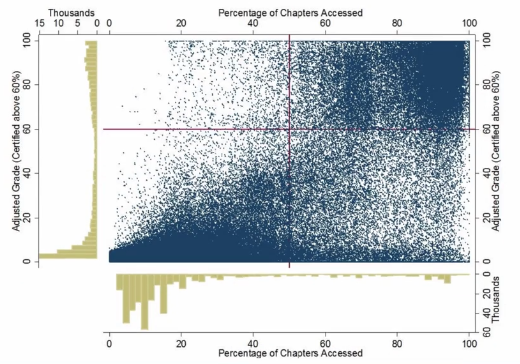
And it should be pretty clear to you now how we might adjust various aspects of this plot so that if we wanted to look even more like that engagement image, we could. 

In the next lecture, we're going to take a look at another kind of plot, the box plot.

In [26]:
%%HTML
<img src='http://educationxpress.mit.edu/sites/default/files/journal/WP1-Fig13.jpg' />

He, K., & Meeden, G. (1997). Selecting the Number of Bins in a Histogram: A Decision Theoretic Approach. Journal of Statistical Planning and inference, 61(1), 49-59.

http://users.stat.umn.edu/~gmeeden/papers/hist.pdf

# Box and Whisker Plots

https://www.coursera.org/learn/python-plotting/lecture/jiPDi/box-plots

A box plot (sometimes called a box-and-whisker plot) is a method of showing __aggregate__ statistics of various samples in a concise matter. 

The box plot simultaneously shows, for each sample, 
- the median of each value,
- the minimum and maximum of the samples,
- and the interquartile range. 

Let's create three different samplings from NumPy. 
- One for the normal distribution. 
- One for random.
- And one from a gamma distribution.

Next, let's put those in a pandas DataFrame. After all, much of the data we would actually process would come from pandas or another data manipulation toolkit and not from NumPy distribution functions. 

In [20]:
import pandas as pd

#create 3 different distributions and put into dataframe
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

## pd.describe()

Now we can use the pandas __describe()__ function to see some summary statistics about our data frame. 
- Each row has 10,000 entries.
- The mean values and standard deviation vary heavily.
- The minimal and maximum values are showing, and
- there's three different percentage values. 
    - These percentage values make up what's called the interquartile range.
    - There are four different quarters of the data.
        1. The first is between the minimal value and the first 25% of the data. And this value of 25% is called the first quartile. 
        2. The second quarter of data is between the 25% mark and the 50% of the data.
        3. The third between 50 and 75% of the data. And 75% mark is called the third quartile. 
        4. And the final piece of data is between the 75% and the maximum of the data. 

Like standard deviation, the _interquartile range_ is a measure of _variability_ of data. And it's common to plot this using a box plot. 
 



In [21]:
#descriptive statistics. The % rows show the interquartile ranges which shows intervariability of data
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,-0.007330,0.505317,2.030182
std,1.003942,0.287124,1.436383
min,-3.656663,0.000112,0.011423
25%,-0.687709,0.259515,0.976035
50%,-0.010018,0.507733,1.708908
75%,0.671524,0.752964,2.737020
max,3.573242,0.999468,13.681642


## Example
In a box plot,
- the mean, or the median, of the data is plotted as a straight line.
- Two boxes are formed, 
    - one above, which represents the 50% to 75% data group,
    - and one below, which represents the 25% to 50% data group.
- Thin lines which are capped are then drawn out to the minimum and maximum values. 

Here's an example. 

- We'll create a new figure.
- Then we call __plt.boxplot__, and we pass in the column that we want to visualize.
    - In matplotlib, data needs to conform to NumPy arrays. But pandas is built on top of NumPy data points, so this is as easy as projecting the column that we're interested in.
    - Finally, we set the __whis__ parameter to be the range.
        - This tells the box plot to set the whisker values all the way out to the minimum and maximum values. 
- Also, I am going to assign the output of the box plot function to a variable, which is just an __underscore__.
    - Now this is either horrendous or beautiful, depending on who you are. 
    - You see, underscore is actually a legal name for a variable on Python. But it's also completely uninformative. 
    - It's common practice by some to use an underscore when unpacking values which you don't care about and won't use later. 
    - I am using it here because if we _don't_ assign the return value of plotting function to a variable, the Jupyter Notebook will assume that we wanted to print that output. 
        - Since plotting functions return a list of all of the artists plotted, this would really muddy up our display.
        It's up to you whether you want to use this underscore pattern or not in your own code.

<IPython.core.display.Javascript object>


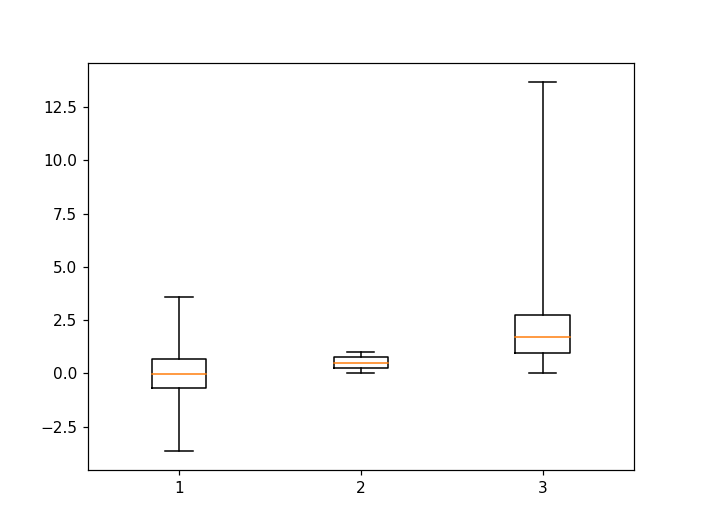

In [22]:
plt.figure()
# create a boxplot of the normal data, assign the output to a variable to supress output
# underscore is a legal name in Python and is used here to suppress output
_ = plt.boxplot(df['normal'], whis='range')

Great, this gives us a basic box plot. 

Now let's add the other two samples to it. Unfortunately we can't just pass a whole pandas data frame to matplotlib. Instead we need to pull out each column and send them in as a list of values. 



In [23]:
# clear the current figure
plt.clf()
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')

All right, that gives us our three distributions. 

Now, we didn't normalize the scale, so that's a little wonky. 

But if we look at the gamma distribution, for instance, we see the _tail_ of it is very, very long. So the maximum values are very far out.

Let's take a look at this by itself in a histogram. 

<IPython.core.display.Javascript object>


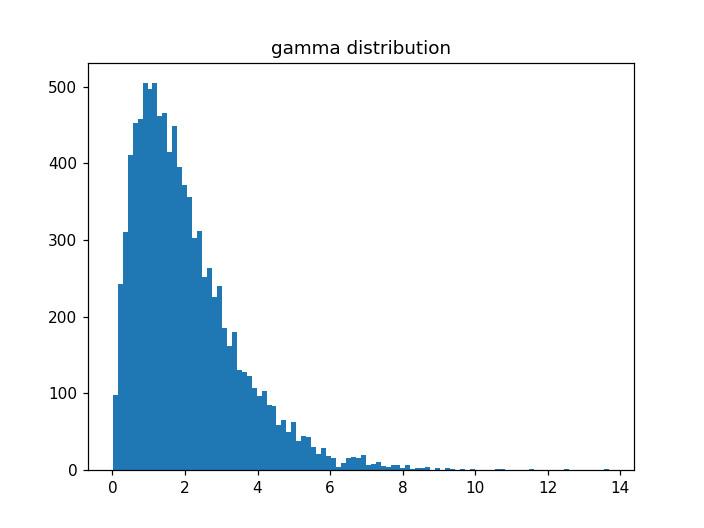

Text(0.5,1,'gamma distribution')

In [25]:
#gamma distribution has a long time
plt.figure()
_ = plt.hist(df['gamma'], bins=100)
plt.title('gamma distribution')

Interesting, we see that the gamma distribution starts at a moderate level, spikes up, then drops off much more gradually and does indeed have a very long tail. 

## Inset axis
Let's add this to our box plot out of curiosity and to demonstrate something called _inset axes_. 

Recall that we have one figure with one subplot. Since we didn't do anything fancy with subplots, that means we only have _one_ axes object. 

### mpl toolkits
We can actually overlay an axes on top of another within a figure. Now, this functionality isn't in the basic matplotlib space, but it's in the __toolkits__, which tend to ship with matplotlib. There are several different toolkits available, and while they tend to be packaged, they aren't considered core. 

The toolkit that we're going to use is called the axes_grid, and we import it from the __mpl_toolkits.axes_grid1.inset_locator__.

- We create a new figure and we put up our box plot. 
- Then we just call the inset locator and pass it
    - the current axes object we want composition on top of, 
    - followed by the size of our new axis. 
        - And we can specify this as both a width and a height in percentage from the parent axes. 
    - Then we give it a number from the place in which we wanted to drop the new axes. This isn't quite as flexible as with grid spec where we're essentially trying to connect the plot to one of ten different locations. I'll put in _position 2_ here, which will place the axes in the upper left of the figure. 
- Then we just push a histogram to that axes and it behaves as we would expect. 



<IPython.core.display.Javascript object>


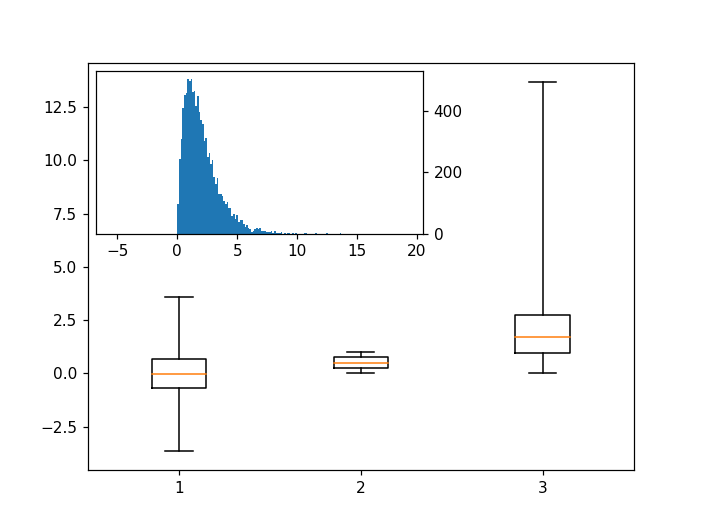

In [26]:
#overlay axes to demonstrate "inset axes". Use "axes_grid" package

import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2) #specify width & height % of original axis
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

We've a little clash on the yaxis but that's easy enough to flip on the inset plot. 

We just access the yaxis of the plot and call tick_right. 

In [27]:
# switch the y axis ticks for ax2 to the right side to avoid clashing with original tick marks
ax2.yaxis.tick_right()

And there we are. An inset plot showing a distribution as a histogram layered on top of a box plot. 

## Additional functions
Now, the box plot has a few more functions which are worth investigating before we finish this lecture off. 

1. First, if you don't supply the whis argument, the whiskers actually only go out to _halfway_ between the interquartile range. You can figure that out through the top of the box minus the bottom of the box and times that value by 1.5. This is one method of detecting outliers. And the points which are plotted beyond the whiskers are called fliers. You can see how this method of outlier detection differs with respect to our three distributions.

<IPython.core.display.Javascript object>


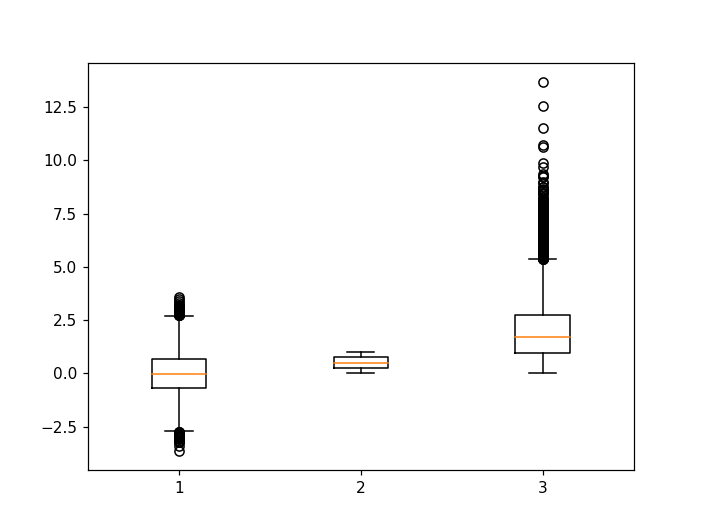

In [28]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
# can also add 95% confidence intervals to the data
# read matplotlib boxplot functionality to see all the different functions
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

2. You can also plot the __confidence interval__ in a couple of different ways on the data. The most common is to add notches to the box plot representing the 95% confidence interval of the data and there are lots of other ways to customize the box plot. 

The box plot is one of the more common plots that you might use as a data scientist. And matplotlib has significant support for different kinds of box plots. Here the matplotlib documentation is key. 

You can find links in the Course Resources to the API, which describes the box plot functionality. 

I've got one more plot to show you: a two dimensional histogram which is better known as a heat map. Then we'll look at a couple more advance features of matplotlib. And I'll see you in the next lecture.

# Heatmaps

https://www.coursera.org/learn/python-plotting/lecture/C0wRQ/heatmaps

Heatmaps are a way to
- visualize _three-dimensional_ data and 
- to take advantage of _spatial_ proximity of those dimensions. 

Now, I honestly didn't think I would include heatmaps in this course. I've seen enough bad heatmaps to last me a lifetime. 

The problem is heatmaps are really quite powerful when you have the right data. 
- __Weather data__ is a great example.
    - You have two dimensions, latitude and longitude, and then we can overlay on top of this a third dimension, say, temperature or rainfall amounts and use color to indicate its intensity. 
- Here's another good example, this time from the Australian Transportation Safety Bureau. And actually on the Wikipedia page for Heatmaps. It shows the __flight path__ of an airline, Malaysian Airlines 370, which went missing in 2014.
    - On top of the flight path is a heatmap showing the probability of the plane if it had crashed. This probability is also displayed as a continuous value, with cool colors, blues, being used for low probabilities and hot or warm colors, reds, being used for high probability.
       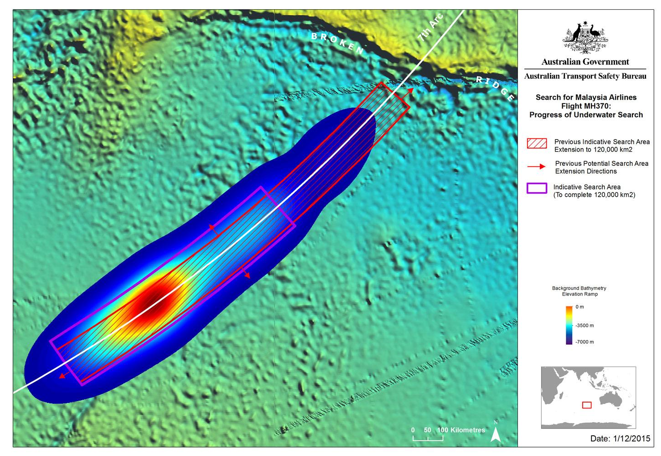

## Pitfalls
So heatmaps aren't all bad. 

But where they __break down__ is when there's <font color='red'>no continuous relationship between dimensions</font>. 

Using a heatmap for <font color=red> categorical data, for instance, is just plain wrong </font>.
- It _misleads_ the viewer into looking for patterns and ordering through spatial proximity.
- And any such patterns would be purely spurious.

Okay, now you've have the lecture, let's talk about the techniques. 

In matplotlib, a heatmap is simply a two-dimensional histogram where
- the x and the y values indicate potential points and 
- the color plotted is the _frequency_ of the observation.

## Example
Earlier, we talked about different statistical distributions and they work well for this demonstration. 

In fact, let's redo our subplots where we showed a scatter plot and two histograms, one for each dimension. 
- In that we define Y values to come from the normal distribution and
- X values to come from a random distribution.
- To plot this as a two-dimensional histogram, we just pass it to the __hist2d__ function.

<IPython.core.display.Javascript object>


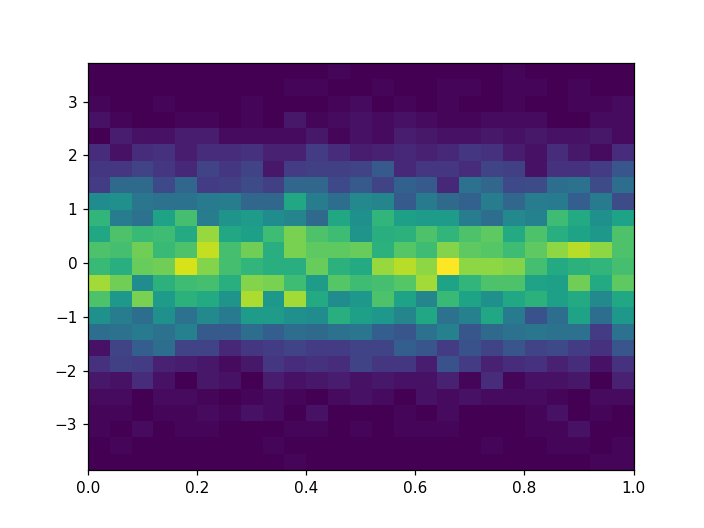

In [29]:
#Heat maps good with right data. They are essentially a 2D histogram
#Weather is good: latitude-by-longitude and then overlap temperature
#Showing probability of location

plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

See how the edge colors on the top and the bottom are very dark purple, while there are greens and yellows in the middle horizon of the image. 

Now we talked a bit about what happens when you increase or decrease the number of bins with regular histograms. 

But how do you think this changes when using heatmaps?

<IPython.core.display.Javascript object>


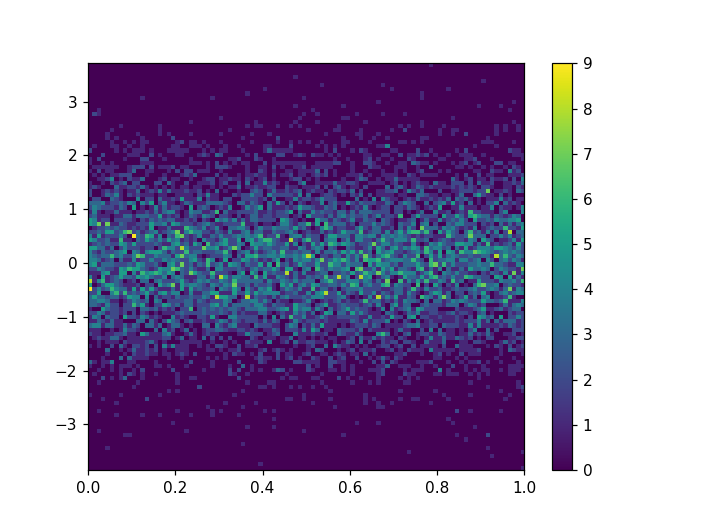

In [30]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)

You see, as you increase the bins you get the same effect: every data point starts to fall into its own category. 

So you get a more clear picture. But everything eventually is just one color since every data point ends up being unique. 

## Legend: colorbar
Now a legend is important and heatmaps are no different. When using the pyplot scripting layer, this is as easy as calling the PyPlot __colorbar__ function. 


In [31]:
# add a colorbar legend
# Under the hood book keeping:
#1) finding current image
#2) generating color bar
#3) resizing existing axes
#4) using gridspec to add new axes the size of color bar 
plt.colorbar()


Be warned though, there's lots of _accounting and bookkeeping_ happening there under the hood. 

In fact, PyPlot is 
- finding the current rendered image, 
- generating the colorbar,
- resizing the existing axes and
- using gridspec to add a new axes the size of the colorbar.

It's quite a bit of bookkeeping. And that's all there is to this though.

Now that you've seen this data in two different ways, a heatmap, where you have an X, a Y, and a color dimension, and a scatterplot, where you have two histograms, one for each axis. 

So which of these approaches do you see yourself using when you have density graphs that you want to share with others?

# Animations

https://www.coursera.org/learn/python-plotting/lecture/WoeKp/animation

So far we focused on static images, but matplotlib does have some support for both _animation_ and _interactivity_. 

Recall this the __backend__ that renders the plot to the stream. 
- <font color=red> Animation and interactivity heavily depend on support from this backend layer. </font>
- And using a backend like the image __png1__ _doesn't_ provide this.
- However, the __nbAgg__ backend or the matplotlib __notebook__ magic function _does_ provide for some interactivity, so we can leverage that here.

The __maplotlib.animation__ module contains important helpers for building animations. 

In [1]:
#Animation and interactivity heavily depend on backend layer
#img png does not provide this but NBN and matplotlib notebook magic does

import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

## FuncAnimation

For our discussion, the important object here is to call __FuncAnimation__. And it builds an animation by _iteratively_ calling a function which you define.

Essentially, your function will either
- clear the axis object and redraw the next frame, which you want users to see 
- or will return a list of objects which need to be redrawn. 

Let's see an example.

- First, let's import the animation module. (done in previous cell)
- Next, let's define a cut-off for our animation. I'd like to show you how the histogram is built from one sample through 100 samples. So let's set our cut off to 100 then randomly pick 100 numbers and put them into a variable. 
- Okay, next we want to actually create a function which will do the plotting. We'll call this function __update__. 
    - Now the matplotlib FuncAnimation object is going to call this every few milliseconds and pass in the frame number we are on starting with frame zero. So we can use this is as the index into our array values, which we called x. 
    - The very first thing we want to do is see if the current frame is at the end of our list. If so, we need to tell the animation to stop. We do this by calling the __stop__ object on the event source object attached to the FuncAnimation object. We're going to call our animation a. So, I'll just use that here.
    - Other than that, we can just drop plot as per normal. So lets first clear the current axis with cla, then create a histogram using a set of value in the x up to the current value. Slicing is great for this.
    - Now we also need to consider the bins. Previously we just passed a single number in for the bins eg 10 or 100. But we can also pass in the spacing in between bins. Since we want all of our bins set and evenly spaced, because we're redrawing the animation in each clock tick, we can use the NumPy arange function. This will ensure that the bins don't change. We use the balance of minus 4 to plus 4, in half-step increments. 
    - We also need to set the axis values since otherwise, the histogram will continually autoscale between frames which could be annoying. So I'll just hard code some values here, often the bin sizes and use 30 as an x and a couple of labels and titles to make the chart look a little better. 
    - Finally, let me show you another text function called annotate. This places text at a certain position in the chart and we'll use it to show how many samples are currently being rendered to the screen. 


In [2]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla() #clear current axis
    bins = np.arange(-4, 4, 0.5) 
    plt.hist(x[:curr], bins=bins) #ensure bins do not change
    plt.axis([-4,4,0,30]) #set axes so avoid auto-scaling off of bin sizes
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27]) #places text at a certain position in the chart

- Now let's just generate a new figure, then call the __FuncAnimation__ constructor and we'll assign this to variable a.
- The first parameter is the figure that we're working with. This isn't so important here, since we're using the PyPlot scripting interface to manage the figure. 
    - Then the name of our function and 
    - then the amount of time we want between updates. Let's set this to 100 milliseconds. 
    - Also, remember that we have to set this to variable a. Otherwise, our function isn't going to know how to stop the animation.

<IPython.core.display.Javascript object>


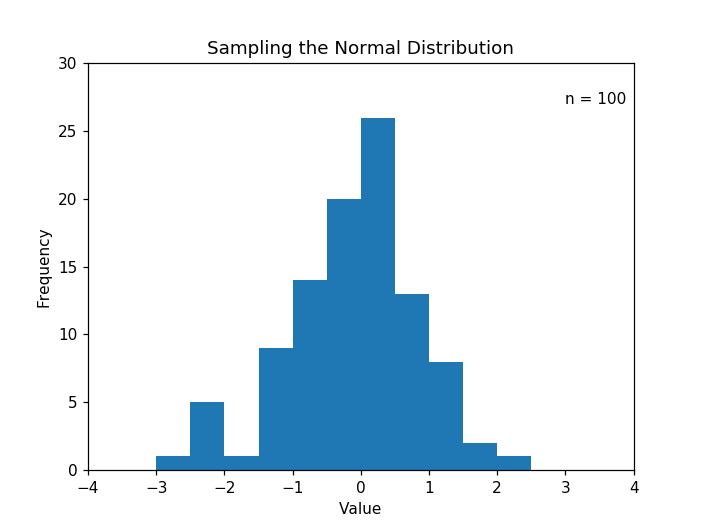

In [6]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100) #interval is in milliseconds to show updates

#animation object as a save function that allows writing animation to a file
#will need to install 3rd party libraries like FFMPEG

There we go. A nice example of how sampling from a distribution an be used with an animation. 

FuncAnimation like most of the other classes in the animation package is a _subclass_ of the animation object.

The animation object has a handy save function, which allows you to write the animation to a file. This requires additional third party library such as FFMpeg which can take a bit to install and set up. 

But the result is that you can fairly easily export your animations directly from the Jupiter Web programming environment.

A figure animation with four sub-plots, one for each kind of distribution we might be interested in understanding, could be pretty neat. 
- We could plot the samples for the normal distribution in one, 
- for a gamma distribution in another, and 
- then maybe a couple of paramaterized distributions like the normal distribution with different levels of standard deviation.

This would be a great way to practice the skills that you've learned in this module, as it would require that you manage multiple sub-plots within an animation using histograms. 

In the next lecture, we'll dig into this event framework a bit more and look at the interactivity.

# Interactivity

https://www.coursera.org/learn/python-plotting/lecture/W2YBx/interactivity

Interactivity and animation are very _similar_ in Matplotlib.

For interactivity though, we have to head down to the __artist layer__ a bit more. In particular, we have to reference the __canvas__ object of the current figure. 
- The canvas object handles all of the drawing events and it's tightly connected with a given backend.

## Event listening
If event listening is something you're not familiar with, it can be a bit of a tough concept to grasp. For decades, computers have had abstract methods for doing multiple things at once and now with multiprocessing and multi-core machines, there's actually physical ways to do many thing at once. 

But even before that, the abstraction news was largely focused on the notion of events.
- Moving a mouse pointer for instance would create an event, 
- clicking will create an event, 
- pressing on keys on the keyboard would create an event. 

And this didn't only happen at the hardware level such as IRQ interrupts but at the software level as well. In fact, event driven programming has infiltrated most of the ways computer programmers regularly engage with software, from HTML and JavaScript, down to lower level C code.

You can think of an event as a <font color=red>piece of data which is associated with a function call</font>. And when the event happens, the software environment, in our case this is Matplotlibs backend, will call the function with the relevant data. 

## Mouse event + example

Let's look at a trivial example. 

- We'll create a new figure and plot some random data to it. 
- Then we'll create a new function called __onclick__. 
- And this takes one parameter, which is the __event__ object. 

So what's in an event object? Well, that depends on the type of the event. 

Here we're going to deal with _mouse_ events. 
- And they have both an x and a y value as far as the location of the mouse in pixels on the canvas.
- As well as an x and a y values first location of the mouse relative to our data and axis.

So for our onclick 
- we'll clear the current axis 
- then plot our data then 
- set the title of the plot to be various location of the mouse. 
- Finally, we have to connect this events to an event listener and this process is usually called wiring it up. 
    - In this case very easy: get the current figure and its canvas subject then call the mpl_connect function, passing in the string for button_press_event as well as reference to the function onclick, which will be call when the event is detected.
    
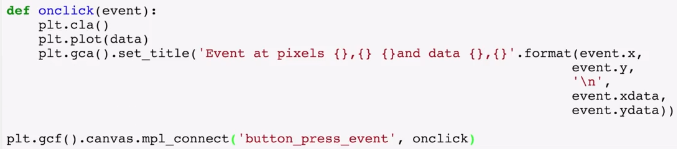

<IPython.core.display.Javascript object>


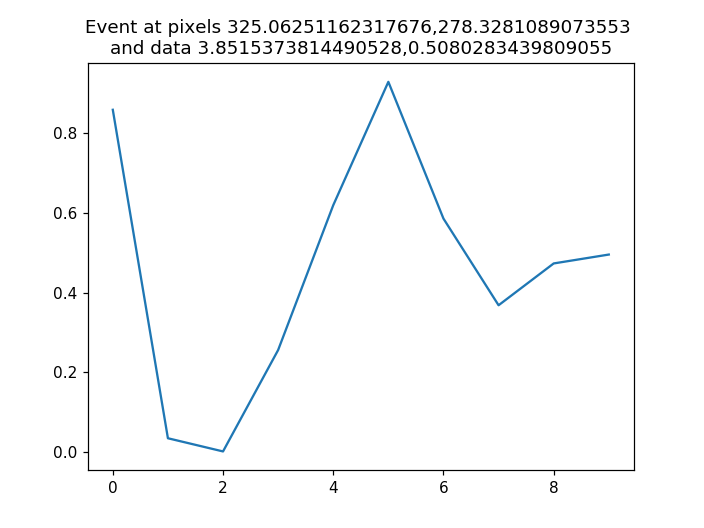

7

In [10]:
#need to head into artist layer more. Need to access canvas object.

plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

#matplotlib documentation lists the events that can be listened from
#The most important even is the pick event however

Now when we click on our plot we see the most information printed to the title. 

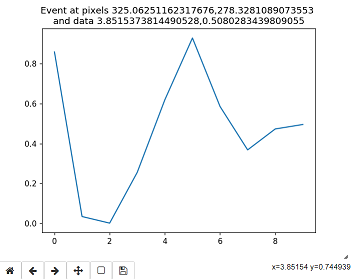

## Pick event + example
The Matplotlib documentation describes the kinds of events you can _listen_ from. But whether they work or not, depends on the backend you're using, and some backends are _not_ interactive.
- Button presses,
- key presses,
- scroll events and
- figure & axis enter and leave events are almost common. 

But the most important event for us is the _pick_ event. The pick event allows you to respond when the user is actually clicked on a visual element in the figure.

Let's look at an example. 

- For this, I want to create a list of countries in randomized order.
    - We can do this with the shuffle function from the random module. 
- Then I'll create a new DataFrame with random values for height and weight, and another column for origin. Great, now we have some seed data to play with.

In [13]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,weight,origin
0,0.417156,0.554597,Brazil
1,0.593311,0.779679,Mexico
2,0.188594,0.501755,Germany
3,0.527115,0.811203,India
4,0.042536,0.453770,China
5,0.273095,0.550112,USA
6,0.322335,0.739846,Chile
7,0.674338,0.321281,UK
8,0.659658,0.062738,Iraq
9,0.161747,0.292885,Canada


- Now we can create a scatterplot with the x and y values as the height and weight respectively, pulling from the data frame. 
- Note that we've added a new argument here called __picker__ and set it to 5.
    - This informs the Matplotlib backend that the mouse doesn't have to click directly on a rendered object that can be up to 5 pixels away and it should find the closest object. 
    - What works for you depends on how you're rendering your charts. 
- With axis labeled, let's go render this. 

<IPython.core.display.Javascript object>


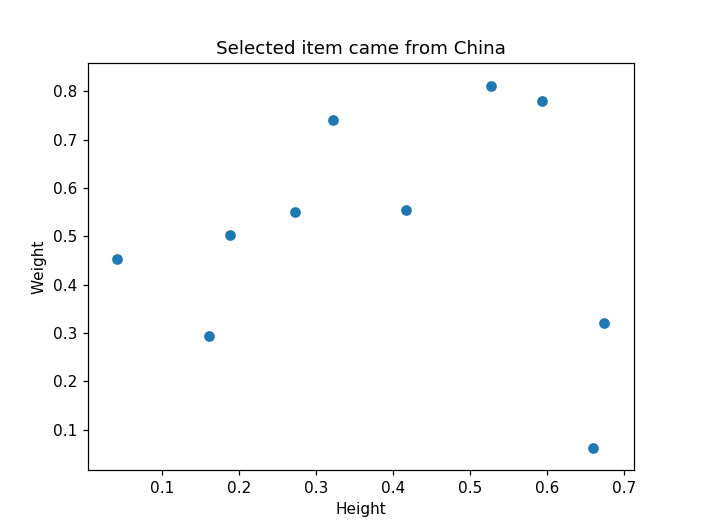

Text(0.5,0,'Height')

In [14]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

Okay, nothing special with this chart yet but let's wire it up. 

We'll create a function called onpick, which takes on an event.
- This event is a __pick event__ which has _different_ data than the _mouse event_. 
- In particular, it's got an index value which happens to correspond to our index and the dataframe. 
- Now Matplotlib isn't aware of the DataFrame but it renders the data in the same order. So we can use the data frame iloc indexer to pull out the origin information. 

Now you can see that when you click on an item, it renders the origin as we would expect.



In [17]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

9

And there we have it, a fairly straight forward example of adding interactivity to your graphs and plots. 

Now I'll be honest, this looks like very little code to write and this lecture was pretty short but there is a lot of hunting through documentation and forms that you have to do it in order to understand the details of the events which are being passed around. 

Pythons _lack of static typing_ has an unfortunate side effect in that <font color=red> much of the documentation for features like events is buried or missing.</font>

# Acknowledgements & Credits

## Week 1

Bateman, S., Mandryk, R. L., Gutwin, C., Genest, A., McDine, D., & Brooks, C. (2010, April). Useful Junk?: The Effects of Visual Embellishment on Comprehension and Memorability of Charts. In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 2573-2582). ACM.

Cairo, A. (2013). The functional art: An introduction to information graphics and visualization. Berkley, CA: New Riders.

Cairo, A. (2013). The truthful art: Data charts and maps for communication. Berkley, CA: New Riders.

Cairo, A. (2015). Graphics lies, misleading visuals. In New Challenges for Data Design (pp. 103-116). Springer London. Retrieved February 17, 2017.

“Charles Minard's map of Napoleon's disastrous Russian campaign of 1812.” Retrieved February 17, 2017 https://en.wikipedia.org/wiki/Charles_Joseph_Minard#/media/File:Minard.png

Dark Horse Analytics. Retrieved February 17, 2017, from http://www.darkhorseanalytics.com/

“Diamonds Were a Girl’s Best Friend” | Nigel Holmes in “A Gem That Lost Its Luster,” Time 120, no. 9 (August 30, 1982) Retrieved February 17, 2017 from http://visualoop.com/media/2015/03/Diamonds-Were-a-Girls-Best-Friend.jpg

Google Finance. Retrieved February 17, 2017 from https://www.google.com/finance?ei=L0IyWJmeHdrEjAGluK24DA#stockscreener

Ho, A. D., Reich, J., Nesterko, S., Seaton, D. T., Mullaney, T., Waldo, J., & Chuang, I. (2014). HarvardX and MITx: The first year of open online courses (HarvardX and MITx Working Paper No. 1). Retrieved February 17, 2017 from https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2381263 for digital copy. (Figure 13, p 31)

Tufte, E. R. (1985). The Visual Display of Quantitative Information. Cheshire, CT: Graphics Press.

Twitter. Retrieved February 17, 2017 from twitter.com

## Week 2

Hunter, J., & Droettboom, M. (2012). matplotlib in A. Brown (Ed.), The Architecture of Open Source Applications, Volume II: Structure, Scale, and a Few More Fearless Hacks (Vol. 2). lulu.com (Licensed under CC)

Rougier NP, Droettboom M, Bourne PE (2014) Ten Simple Rules for Better Figures. PLoS Comput Biol 10(9): e1003833. doi:10.1371/journal.pcbi.1003833

## Week 3

Australian Transport Safety Bureau (2015). MH370 – Definition of Underwater Search Areas (Report). Retrieved February 17, 2017 from https://en.wikipedia.org/wiki/Heat_map#/media/File:MH370_location_probability_heat_map_per_DST_Group_analysis.jpg

He, K., & Meeden, G. (1997). Selecting the Number of Bins in a Histogram: A Decision Theoretic Approach. Journal of Statistical Planning and Inference, 61(1), 49-59.

Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions. In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM.

“Sample-Oriented Task-Drive Visualizations: Allowing Users to Make Better, More Confident Decision.” Retrieved February 17, 2017 from https://www.youtube.com/watch?v=BI7GAs-va-Q

## Week 4

Spurious Correlations. Retrieved from February 17, 2017 from http://www.tylervigen.com/spurious-correlations

This course was originally launched on 3/6/2017.